In [ ]:
Drop foreign key constraints and triggers on the target database.
------------------------------------------------------------------------------

During the full load process, AWS DMS does not load tables in any particular order, so it may load the child table data before 
parent table data. 
As a result, foreign key constraints might be violated if they are enabled. Also, if triggers are present on the target database, 
then it may change data loaded by AWS DMS in unexpected ways.

select 'ALTER TABLE '||table_schema||'.'||table_name||' DROP CONSTRAINT '||constraint_name||' ;' 
from information_schema.table_constraints 
where table_schema in ('co','hr') and constraint_type = 'FOREIGN KEY'
order by table_schema , table_name;

-- 19 rows

select 'DROP TRIGGER '||trigger_name||' ON '||trigger_schema||'.'||event_object_table||' ;'
from information_schema.triggers
where trigger_schema in ('co','hr')
order by trigger_schema ,event_object_table;

-- 10 triggers

if you donot have a script , generate a script before dropping foreign key constraints and triggers. 
later after migration you can run this script to create those back.

In [ ]:
Step 7: Create and Run Your AWS DMS Migration Task
----------------------------------------------------------

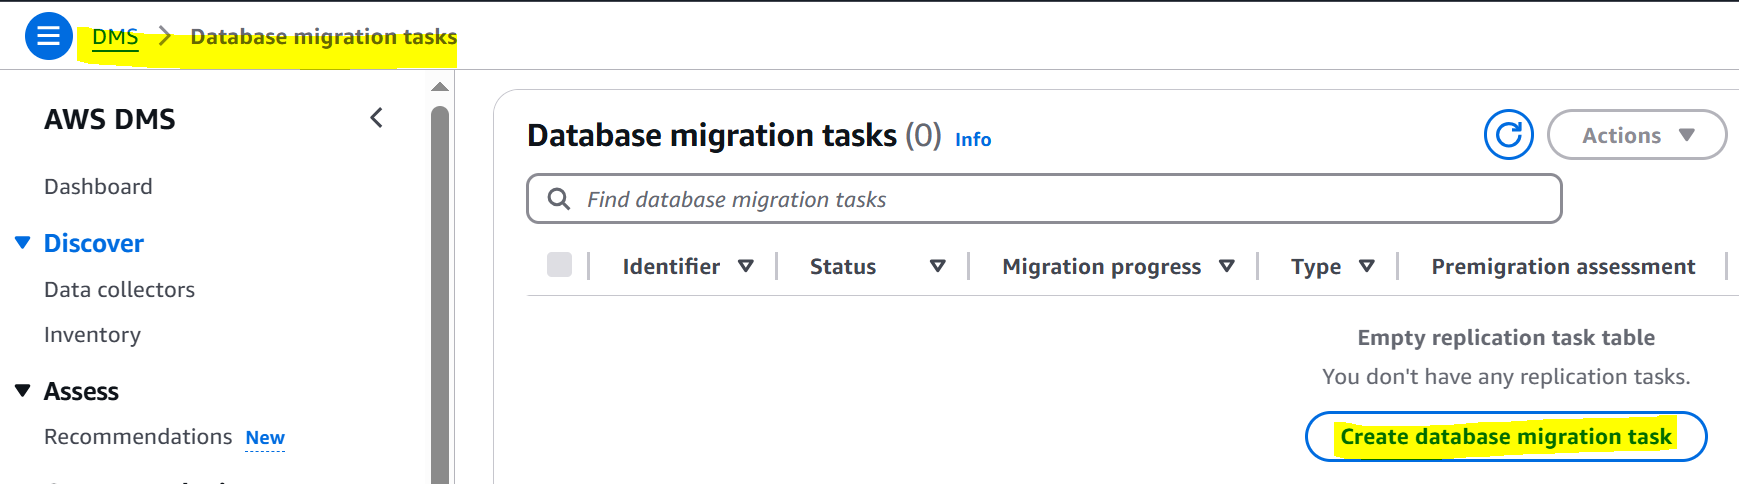

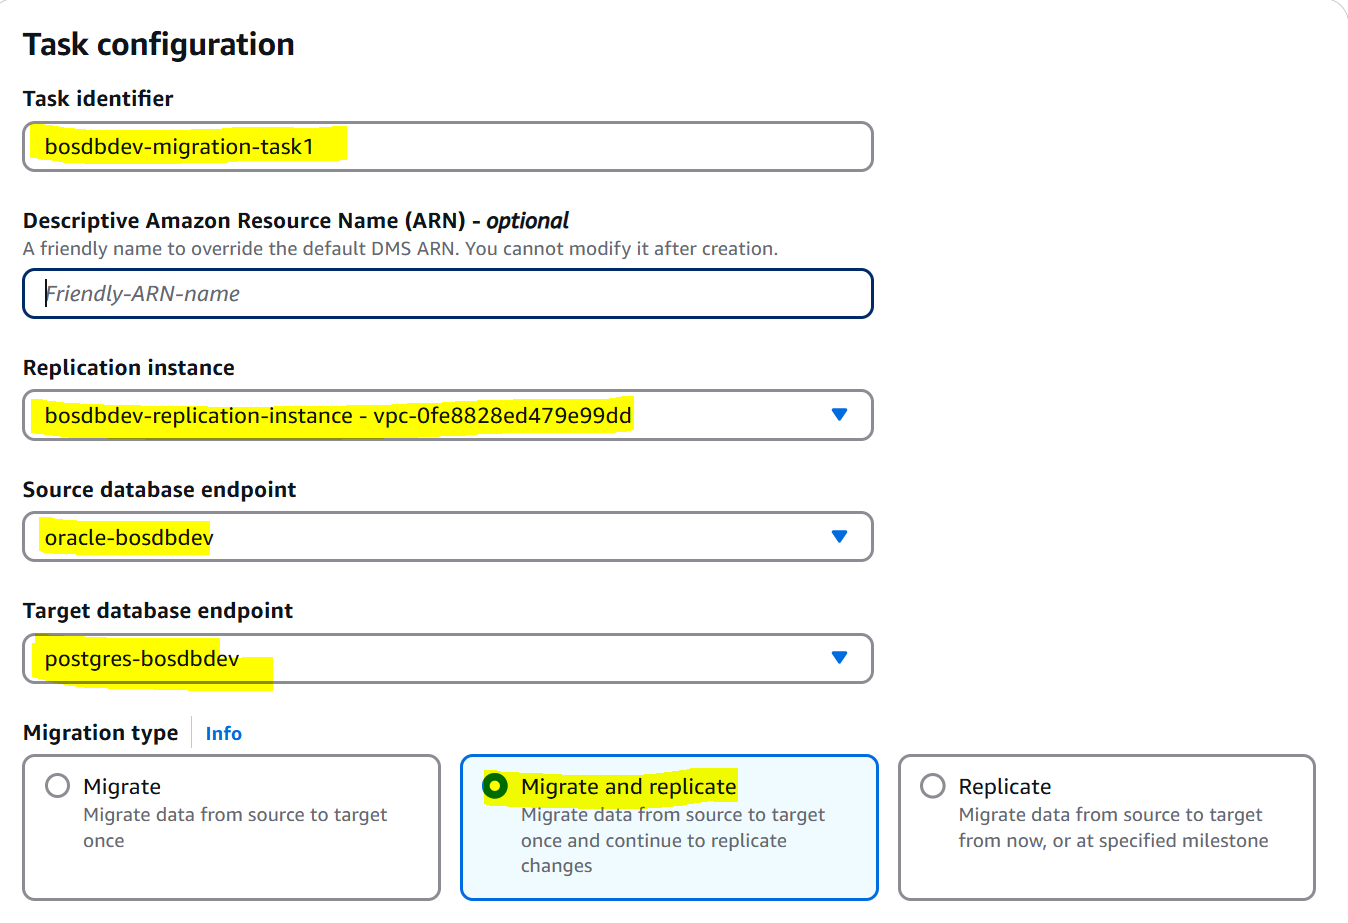

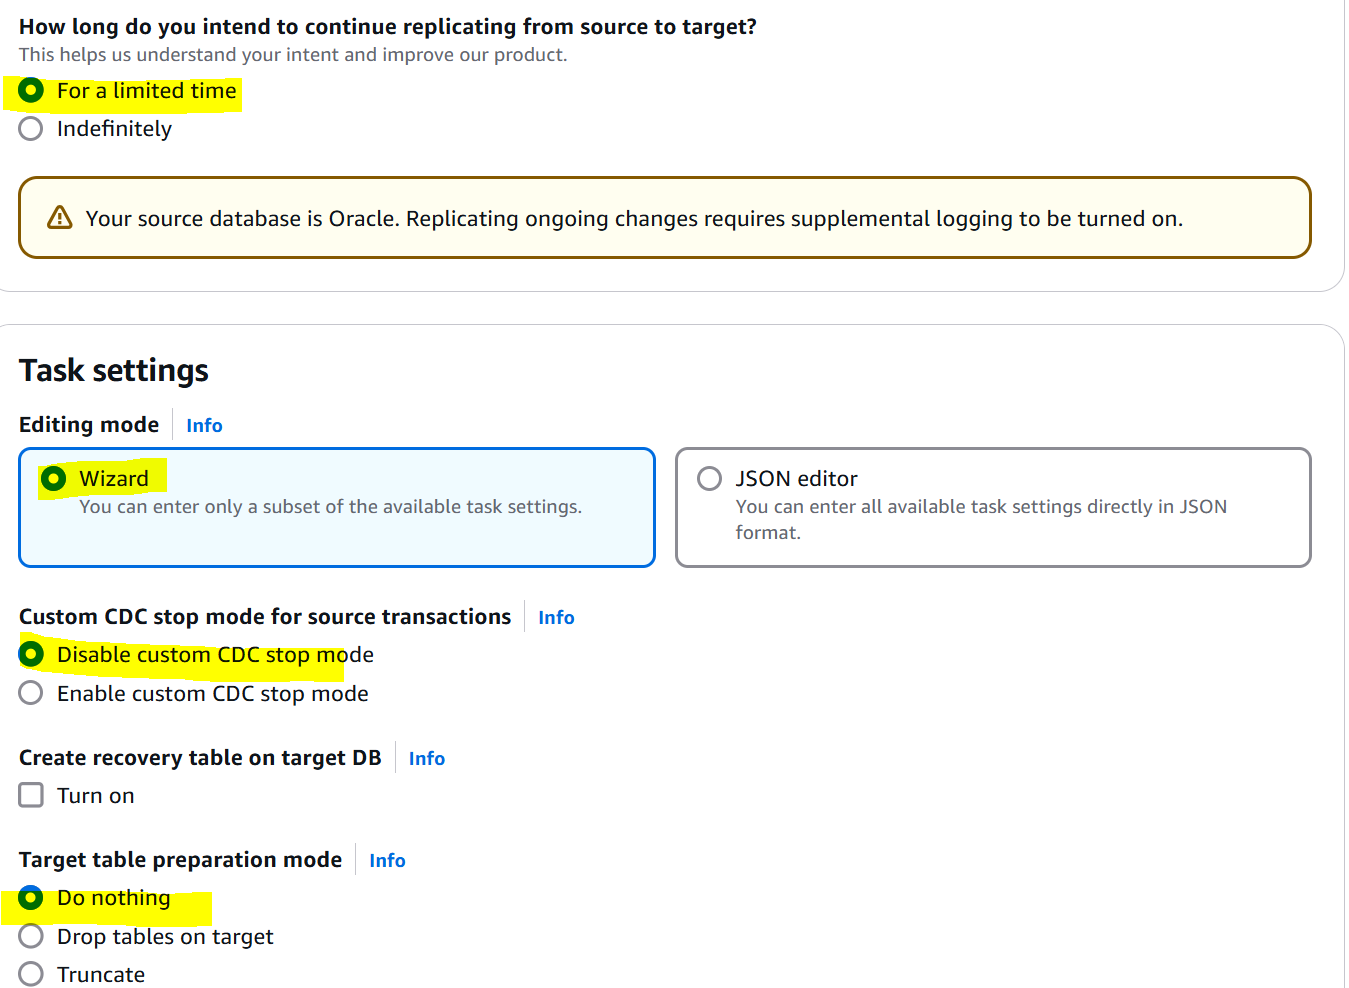

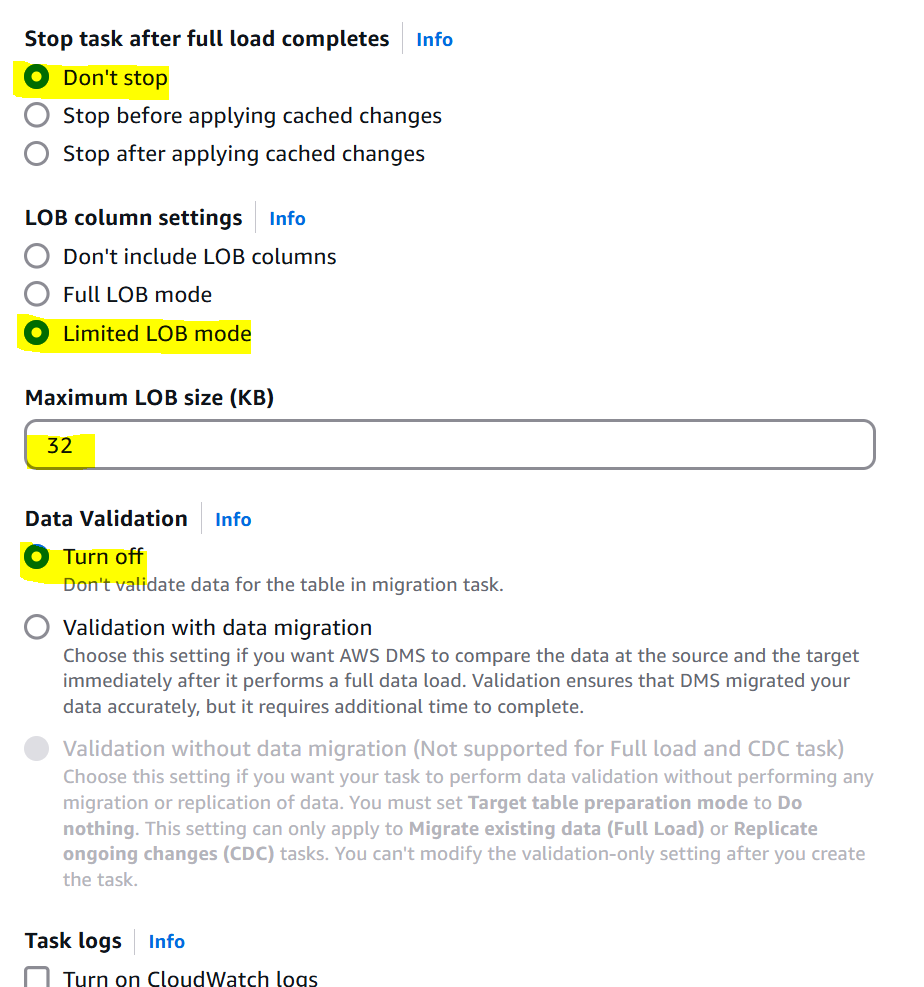

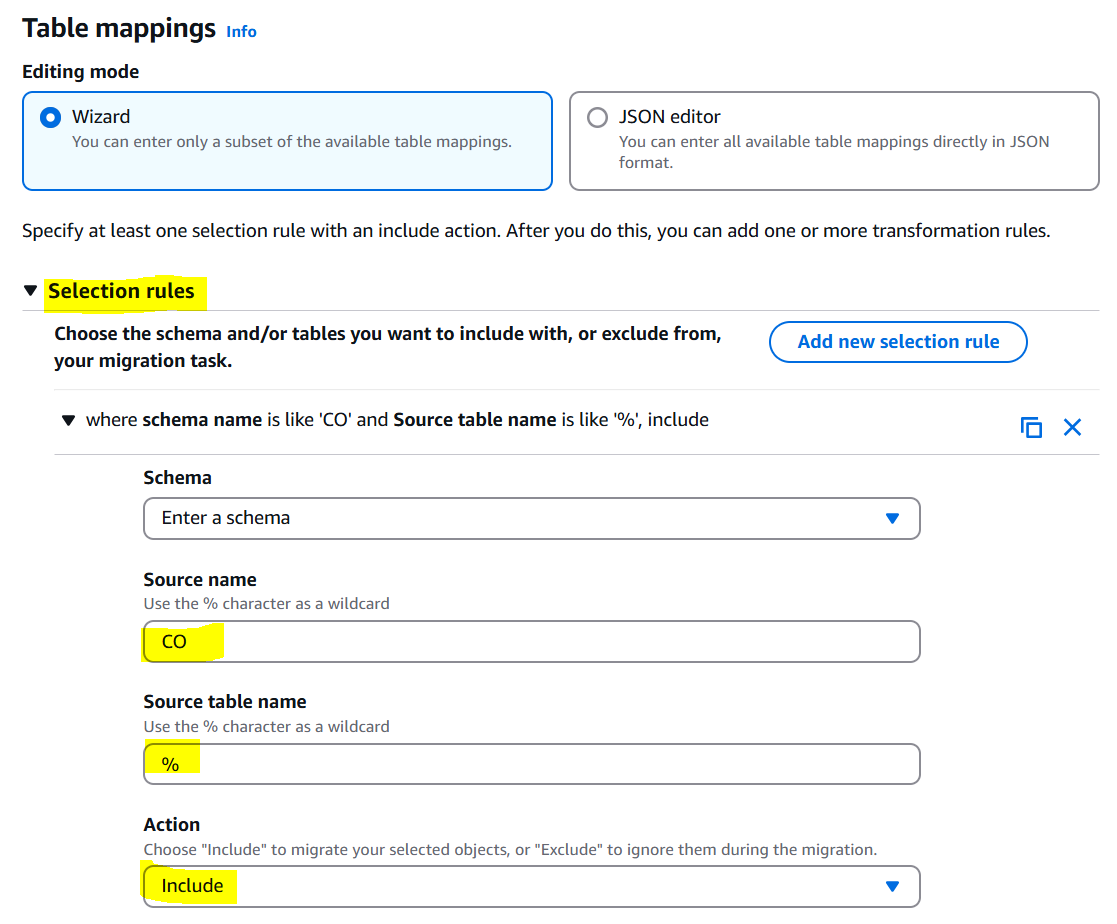

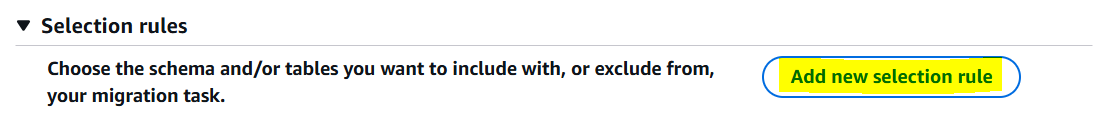

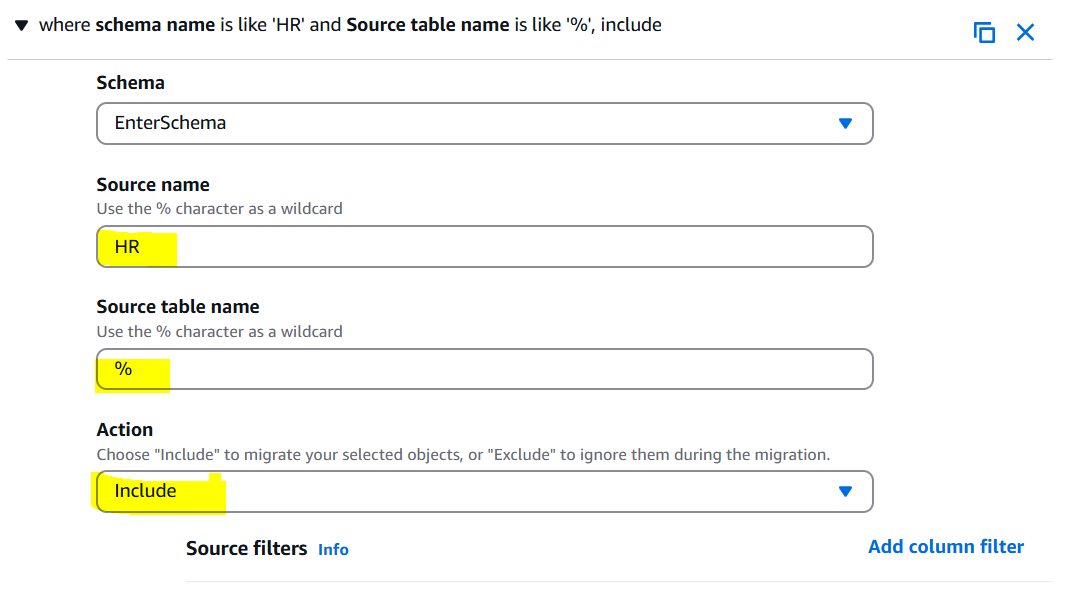

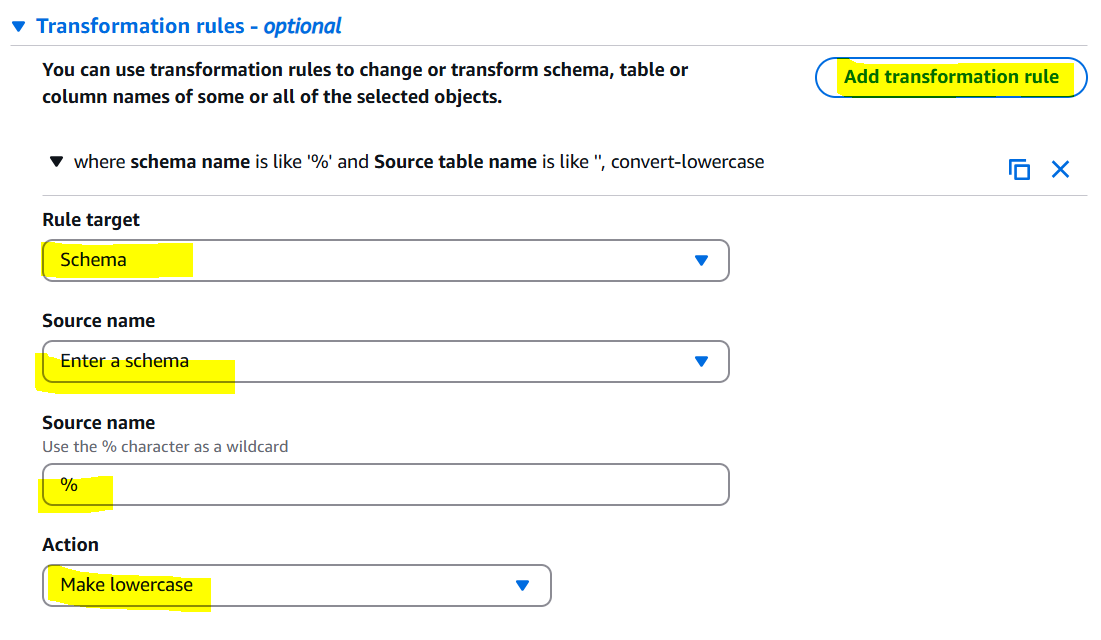

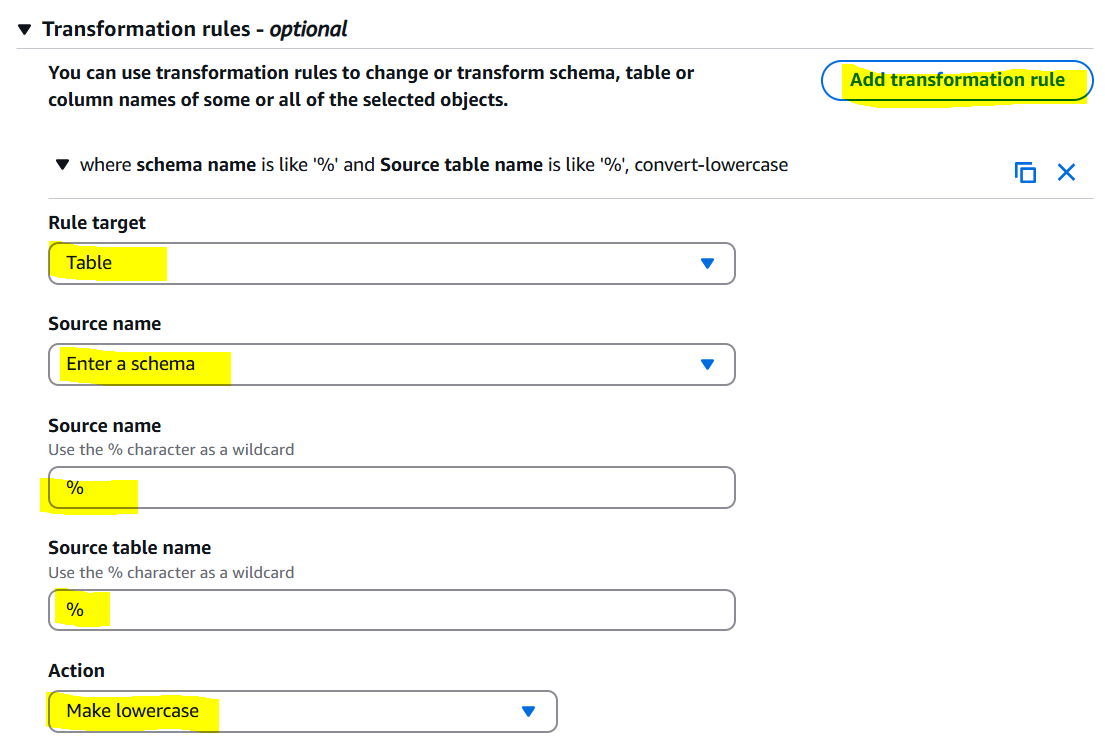

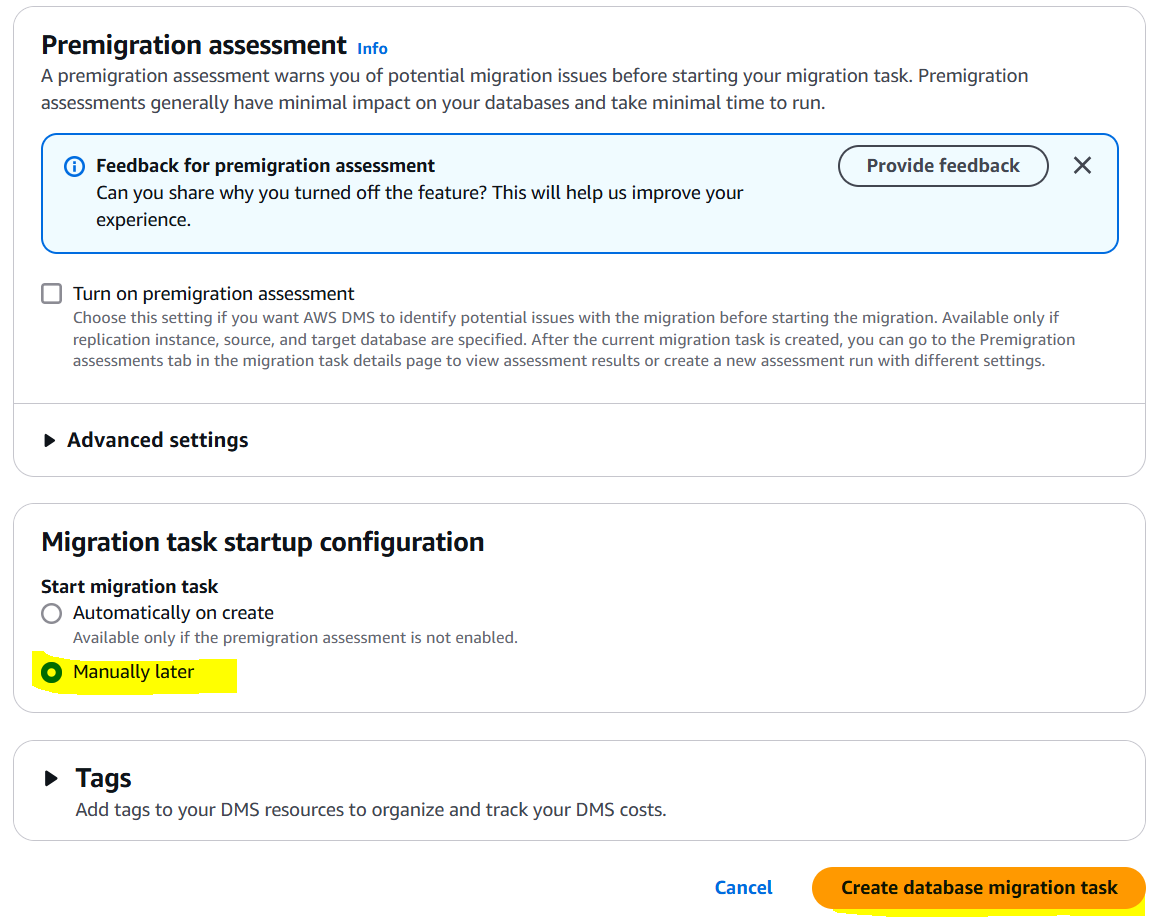

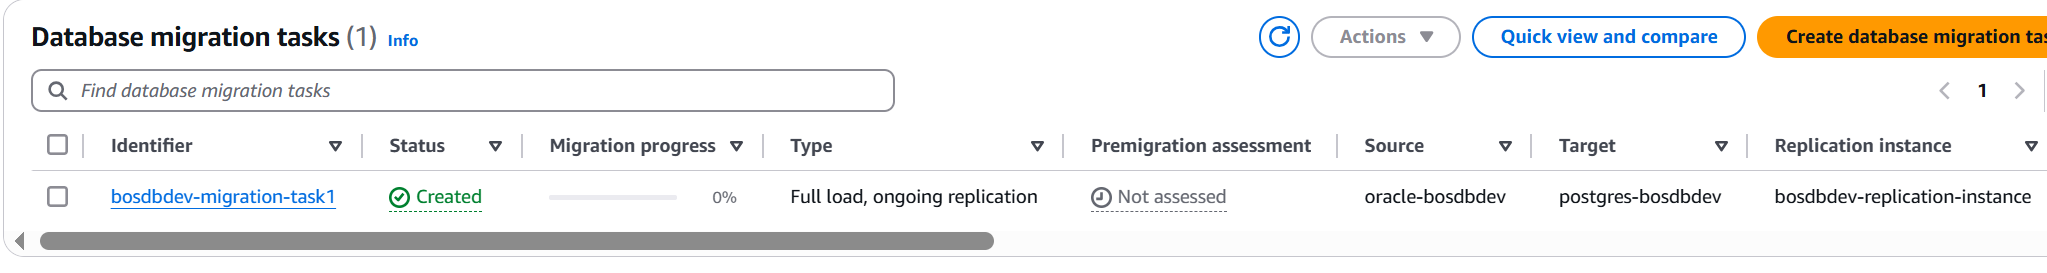

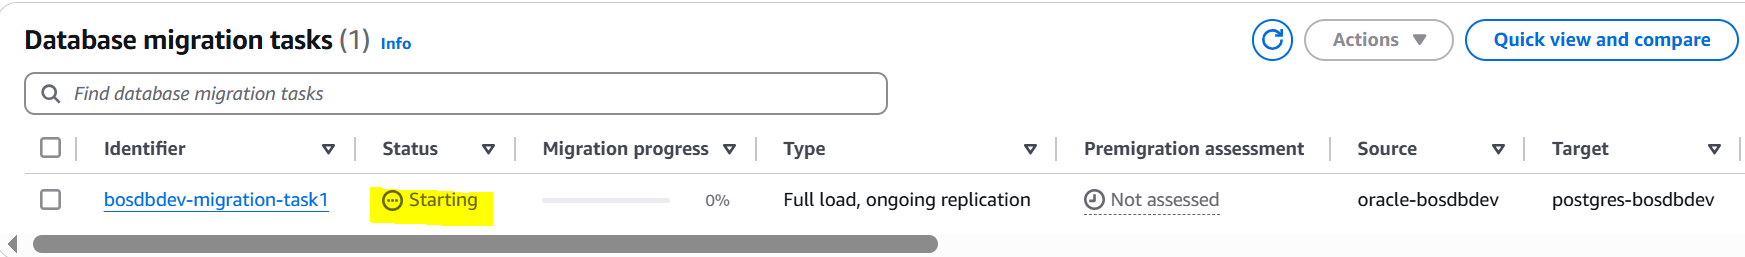

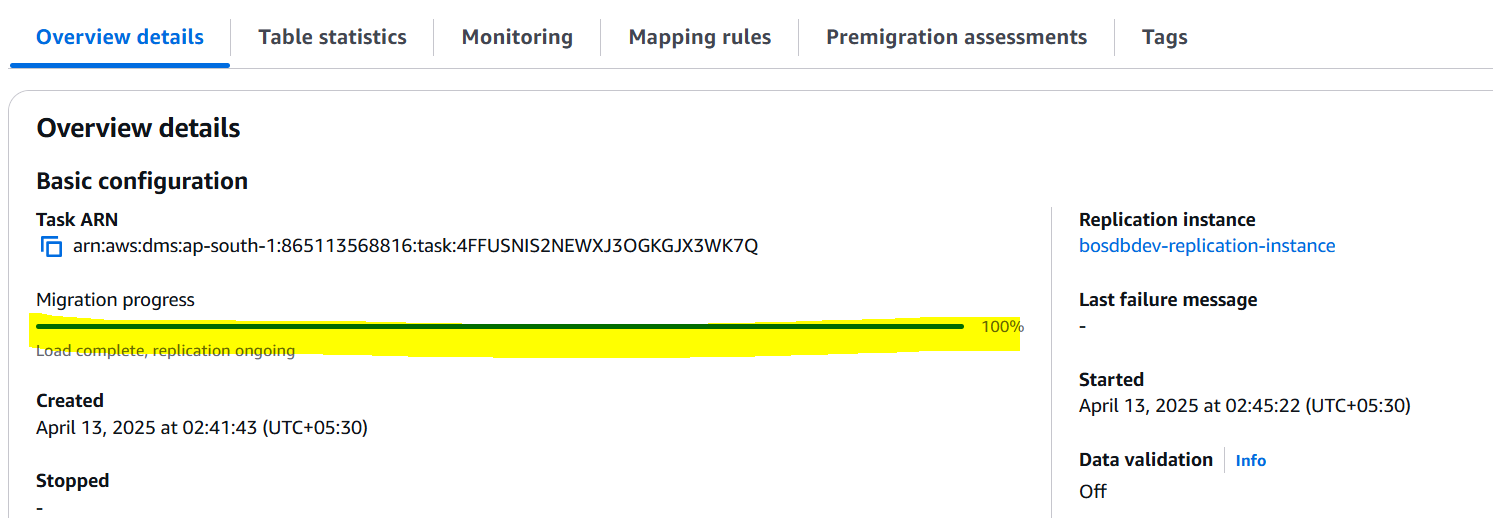

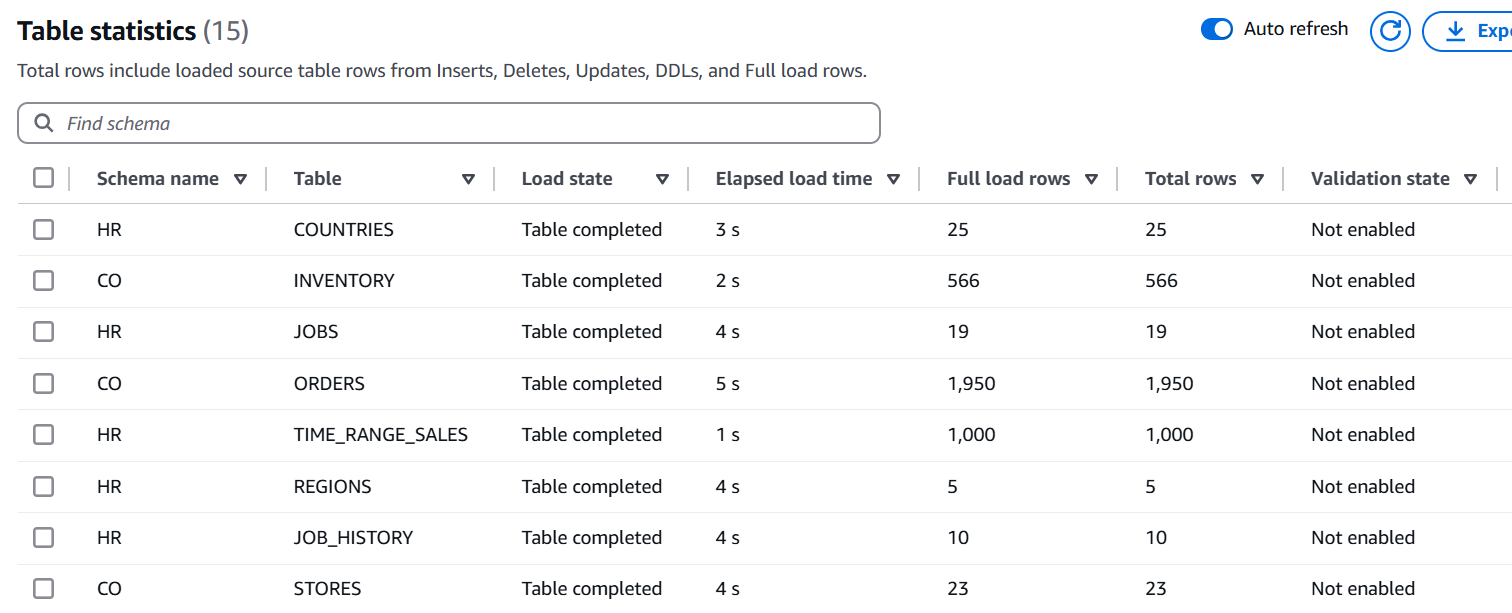

In [ ]:
Check the number of tables in source and target 
-----------------------------------------------------------------

SELECT OWNER,TABLE_NAME,NUM_ROWS
FROM DBA_TABLES WHERE OWNER IN ('CO','HR')
ORDER BY OWNER,TABLE_NAME;
    "OWNER",    "TABLE_NAME",   "NUM_ROWS"
    CO,         CUSTOMERS,          392
    CO,         INVENTORY,          566
    CO,         ORDERS,             1950
    CO,         ORDER_ITEMS,        3914

select schemaname,relname,n_live_tup from pg_catalog.pg_stat_all_tables
where schemaname in ('co','hr')
order by schemaname,relname;
"schemaname",   "relname",  "n_live_tup"
    co,         customers,      392
    co,         inventory,      566
    co,         order_items,    3914
    co,         orders,         1950
